In [1]:
import pandas as pd
import pickle
from skimage.transform import rescale
import imageio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer
from skimage.feature import hog
import torch
from torch.utils.data import Dataset
import pandas as pd
import pickle
from skimage.transform import rescale
import imageio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import torch
from torch.utils.data import Dataset
import multiprocessing as mp


with open('/home/robotixx/Documents/elevation.pickle', 'rb') as f:
    df = pickle.load(f)

with open('/home/robotixx/Documents/traversability.pickle', 'rb') as f:
    df1 = pickle.load(f)
    
df.shape, df1.shape

((4057, 5), (4057, 5))

In [2]:
df.shape

(4057, 5)

In [3]:
X_e = list(df['image'].values)
#print(X_e)
X_e= np.array(X_e)
#X_e = X_e.reshape(X_e.shape[0], -1)
y_e = df['pitch'].values

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_e_l = discretizer.fit_transform(y_e.reshape(-1, 1)).ravel()


X_t = list(df1['image'].values)
X_t = np.array(X_t)
#X_t = X_t.reshape(X_t.shape[0], -1)
y_t = df1['pitch'].values

f = y_e.tolist()
z = y_t.tolist()
ze = []
for i in range (len(f)):
    if (abs(f[i] - z[i]) < 0.6):
        ze.append(i)
      
xd1 = X_e[ze]
xd2 = X_t[ze]
yd1 = y_e[ze]
yd2 = y_t[ze]
yd1_l = y_e_l[ze]

xd1.shape, xd2.shape, yd1.shape, yd2.shape, yd1_l.shape

((4022, 400, 200), (4022, 400, 200), (4022,), (4022,), (4022,))

In [4]:
images = [torch.tensor(xd1[row]) for row in range (3000)]

In [5]:
len(images)

3000

In [6]:
images = [img.float() / 255.0 for img in images]

In [7]:
# Define HOG parameters
orientations = 8
pixels_per_cell = (4, 4)
cells_per_block = (4, 4)

# Define function for HOG feature extraction
def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Perform HOG feature extraction
        hog_image = hog(image.numpy(), orientations=orientations,
                        pixels_per_cell=pixels_per_cell,
                        cells_per_block=cells_per_block)
        hog_features.append(hog_image)
    return hog_features


In [8]:
hog_features = extract_hog_features(images)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, yd1_l[:3000], test_size=0.2)

In [10]:
# Train the SVM model
svm = SVC(kernel='linear', C=1, gamma='auto')
svm.fit(X_train, y_train)

# Evaluate the SVM model
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6816666666666666


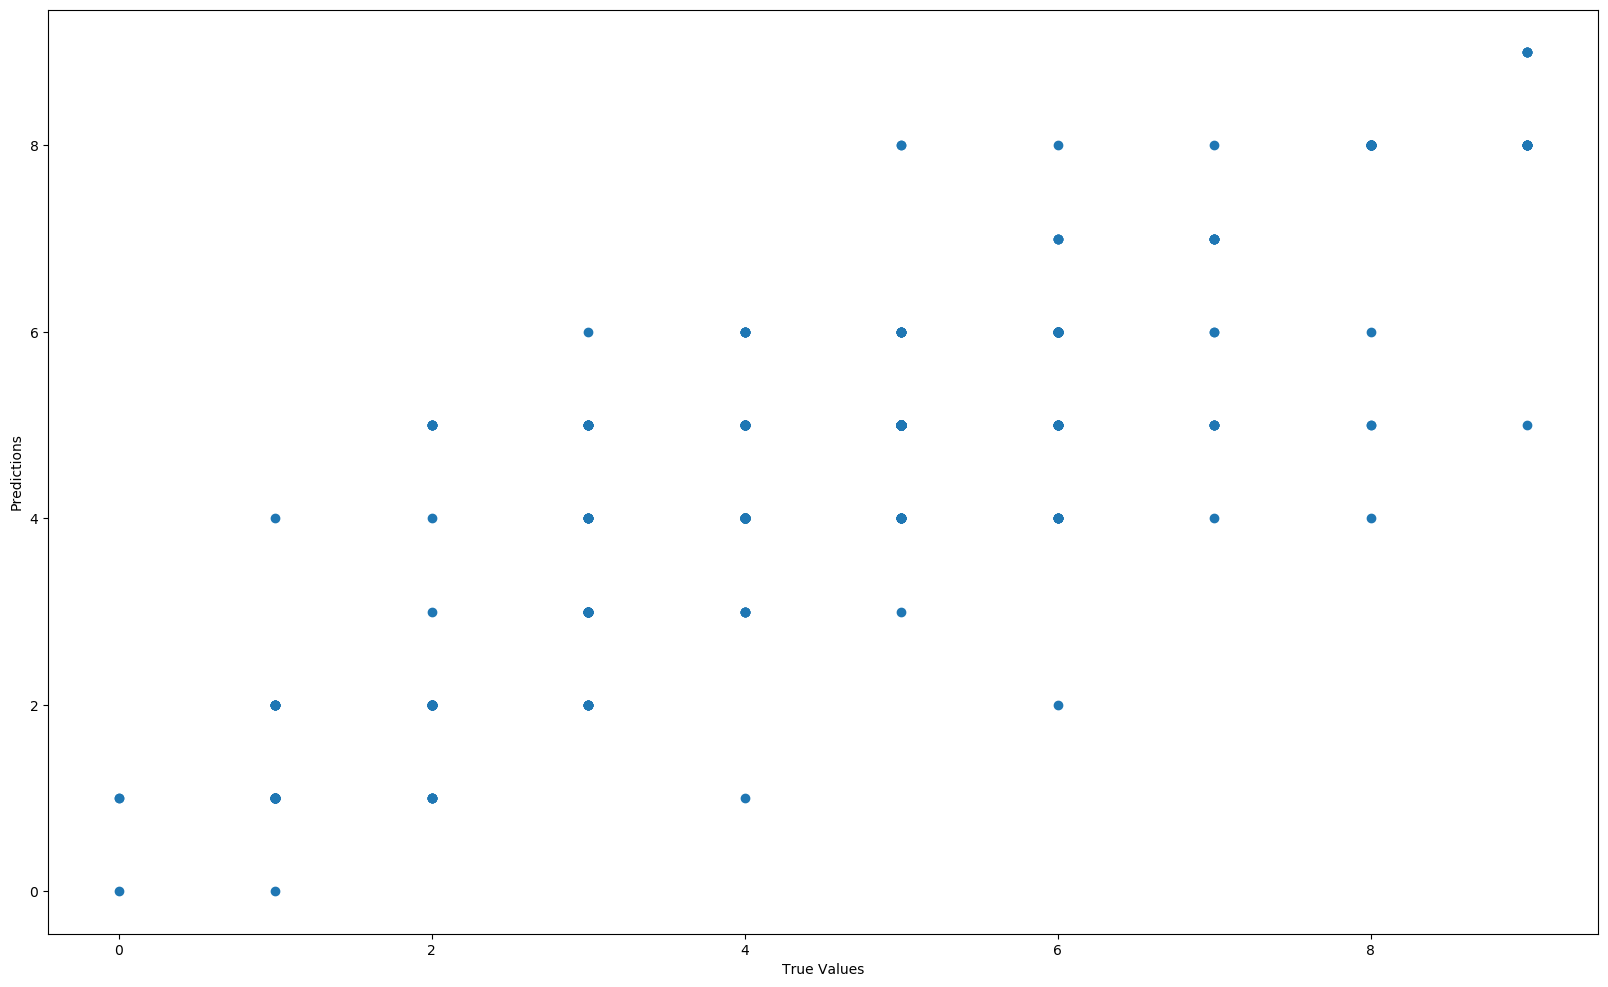

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.show()